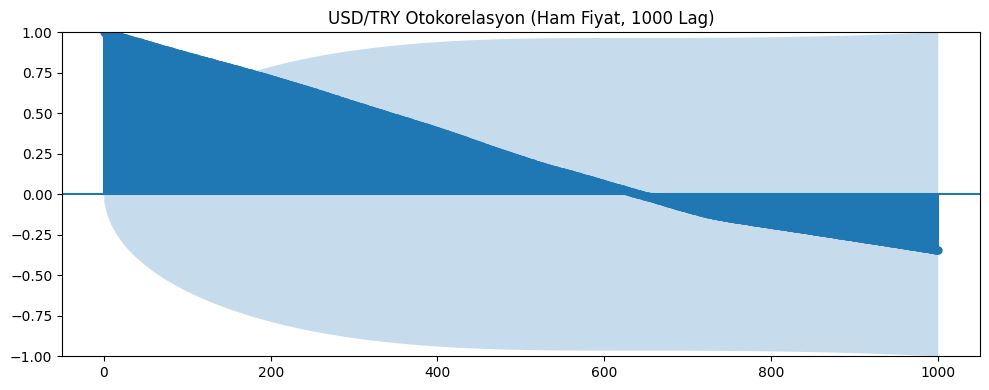


--- ACF & p-değerleri (ham fiyat) ---
 Lag       ACF  p-value
   1  0.998589      0.0
   2  0.997161      0.0
   3  0.995719      0.0
   4  0.994259      0.0
   5  0.992812      0.0
   6  0.991367      0.0
   7  0.989938      0.0
   8  0.988517      0.0
   9  0.987085      0.0
  10  0.985670      0.0
  11  0.984263      0.0
  12  0.982849      0.0
  13  0.981443      0.0
  14  0.980023      0.0
  15  0.978596      0.0
  16  0.977158      0.0
  17  0.975706      0.0
  18  0.974244      0.0
  19  0.972785      0.0
  20  0.971331      0.0
  21  0.969879      0.0
  22  0.968426      0.0
  23  0.966968      0.0
  24  0.965499      0.0
  25  0.964031      0.0
  26  0.962569      0.0
  27  0.961085      0.0
  28  0.959604      0.0
  29  0.958121      0.0
  30  0.956634      0.0
  31  0.955139      0.0
  32  0.953640      0.0
  33  0.952141      0.0
  34  0.950662      0.0
  35  0.949192      0.0
  36  0.947717      0.0
  37  0.946241      0.0
  38  0.944763      0.0
  39  0.943281      0.0
 

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf          # ACF değer & p-değeri
from statsmodels.stats.diagnostic import acorr_ljungbox

# --------------------------------------------------------------------
# 1) Veri çekme – son 5 yıl, ham kapanış fiyatı
ticker = "USDTRY=X"
end   = pd.Timestamp.today().normalize()
start = end - pd.DateOffset(years=5)

df = yf.download(ticker, start=start, end=end, progress=False)
prices = df["Close"]

# --------------------------------------------------------------------
# 2) Takvimi "tüm günler" olarak genişlet ve eksikleri doldur
all_days = pd.date_range(start=start, end=end, freq="D")
prices   = prices.reindex(all_days)      # NaN olan günler: hafta sonu & tatil
prices   = prices.ffill()                # Son geçerli fiyatla doldur (forward-fill)

# --------------------------------------------------------------------
# 3) ACF grafiği (30 lag)
lags = 10000
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(prices, lags=lags, ax=ax, title=f"USD/TRY Otokorelasyon (Ham Fiyat, {lags} Lag)")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------
# 4) ACF değerleri ve p-değerleri tablo hâlinde
acf_vals, confint, qstat, pvals = acf(
    prices, nlags=lags, qstat=True, alpha=0.05, fft=True
)
acf_table = pd.DataFrame({
    "Lag":      range(1, lags + 1),
    "ACF":      acf_vals[1:],          # 0. lag'ı atla
    "p-value":  pvals
})
print("\n--- ACF & p-değerleri (ham fiyat) ---")
print(acf_table.to_string(index=False))

# --------------------------------------------------------------------
# 5) Ljung-Box testi (1–30 lag arası topluca)
lb = acorr_ljungbox(prices, lags=range(1, lags + 1), return_df=True)
print("\n--- Ljung-Box Testi (ham fiyat) ---")
print(lb.tail())            # Son satırlarda lag=30 sonucunu görebilirsiniz


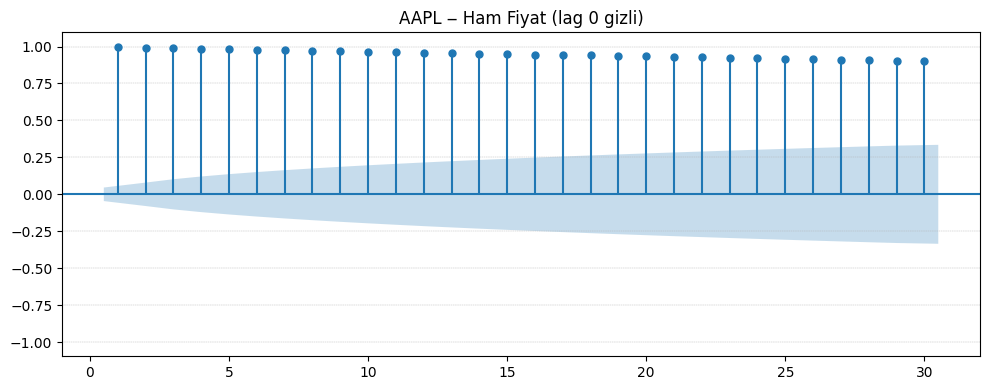


--- AAPL ‒ Ham Fiyat | ACF & p-değerleri ---
 Lag      ACF  p-value
   1 0.996374      0.0
   2 0.992641      0.0
   3 0.988914      0.0
   4 0.985210      0.0
   5 0.981471      0.0
   6 0.977884      0.0
   7 0.974374      0.0
   8 0.970932      0.0
   9 0.967529      0.0
  10 0.964179      0.0
  11 0.961049      0.0
  12 0.958006      0.0
  13 0.955125      0.0
  14 0.951960      0.0
  15 0.948926      0.0
  16 0.945849      0.0
  17 0.942669      0.0
  18 0.939532      0.0
  19 0.936481      0.0
  20 0.933355      0.0
  21 0.930188      0.0
  22 0.927048      0.0
  23 0.923864      0.0
  24 0.920717      0.0
  25 0.917357      0.0
  26 0.913868      0.0
  27 0.910601      0.0
  28 0.907532      0.0
  29 0.904480      0.0
  30 0.901343      0.0

--- AAPL ‒ Ham Fiyat | Ljung-Box ---
         lb_stat  lb_pvalue
26  43626.873778        0.0
27  45166.220311        0.0
28  46696.055440        0.0
29  48216.463449        0.0
30  49727.184612        0.0


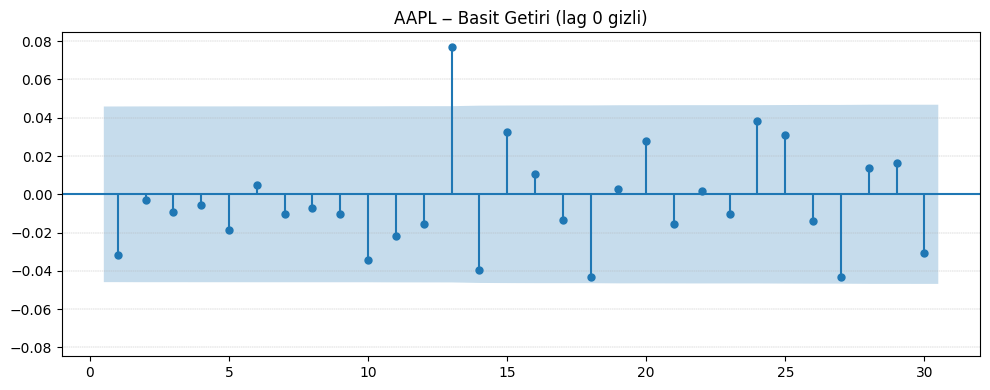


--- AAPL ‒ Basit Getiri | ACF & p-değerleri ---
 Lag       ACF  p-value
   1 -0.031687 0.175365
   2 -0.003130 0.395660
   3 -0.009486 0.568439
   4 -0.005623 0.721582
   5 -0.018535 0.745075
   6  0.005019 0.839146
   7 -0.010329 0.889698
   8 -0.007200 0.931567
   9 -0.010100 0.954411
  10 -0.034212 0.864192
  11 -0.021755 0.855952
  12 -0.015594 0.876749
  13  0.076910 0.173671
  14 -0.039583 0.115797
  15  0.032451 0.097297
  16  0.010347 0.124401
  17 -0.013230 0.151260
  18 -0.043159 0.091435
  19  0.002700 0.119659
  20  0.027958 0.113348
  21 -0.015437 0.132486
  22  0.001641 0.166544
  23 -0.010526 0.197944
  24  0.038284 0.148063
  25  0.031207 0.130912
  26 -0.014028 0.151601
  27 -0.043426 0.097518
  28  0.013970 0.113823
  29  0.016496 0.128277
  30 -0.030870 0.114729

--- AAPL ‒ Basit Getiri | Ljung-Box ---
      lb_stat  lb_pvalue
26  33.371149   0.151601
27  36.870083   0.097518
28  37.232400   0.113823
29  37.737856   0.128277
30  39.509014   0.114729


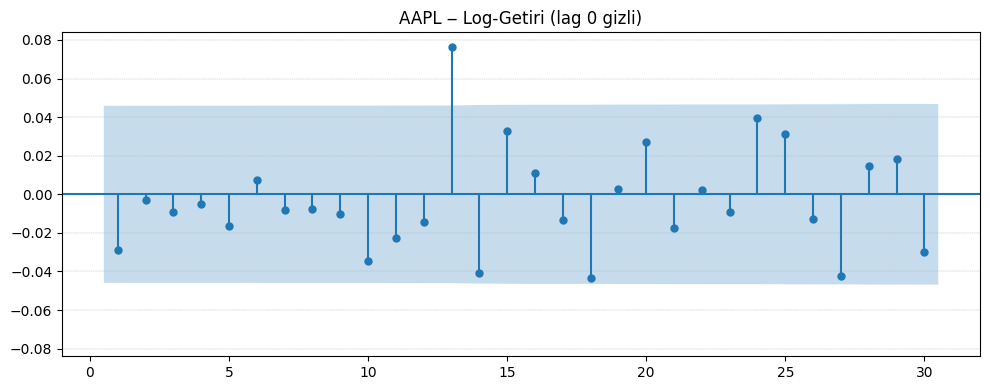


--- AAPL ‒ Log-Getiri | ACF & p-değerleri ---
 Lag       ACF  p-value
   1 -0.028733 0.219137
   2 -0.002786 0.466681
   3 -0.008924 0.643614
   4 -0.004894 0.788188
   5 -0.016580 0.818255
   6  0.007200 0.888790
   7 -0.008008 0.932232
   8 -0.007560 0.960053
   9 -0.009996 0.974399
  10 -0.034612 0.896388
  11 -0.022465 0.883235
  12 -0.014549 0.903576
  13  0.076300 0.201271
  14 -0.040826 0.129277
  15  0.032651 0.108002
  16  0.010789 0.136629
  17 -0.013108 0.165392
  18 -0.043344 0.099926
  19  0.002635 0.130037
  20  0.027136 0.125267
  21 -0.017520 0.142032
  22  0.002085 0.177608
  23 -0.009380 0.211838
  24  0.039735 0.152931
  25  0.031395 0.134697
  26 -0.012878 0.157395
  27 -0.042432 0.104693
  28  0.014743 0.120902
  29  0.018406 0.132974
  30 -0.029835 0.121493

--- AAPL ‒ Log-Getiri | Ljung-Box ---
      lb_stat  lb_pvalue
26  33.163932   0.157395
27  36.504544   0.104693
28  36.908048   0.120902
29  37.537309   0.132974
30  39.191635   0.121493


In [12]:
# ----------------------------------------------
# 0) KÜTÜPHANELER
# ----------------------------------------------
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# ----------------------------------------------
# 1) PARAMETRELER
# ----------------------------------------------
ticker = "AAPL"            # Örn. "USDTRY=X" da olabilir
years_back = 5
lags = 30

# ----------------------------------------------
# 2) VERİ ÇEK & TAKVİMİ TAMAML A
# ----------------------------------------------
end   = pd.Timestamp.today().normalize()
start = end - pd.DateOffset(years=years_back)

df = yf.download(ticker, start=start, end=end, progress=False)
# Hisse ise temettü-bölünme düzeltilmiş kapanış, döviz ise Close
prices = df.get("Adj Close", df["Close"]).copy()

all_days = pd.date_range(start=start, end=end, freq="D")
prices = prices.reindex(all_days).ffill()

# ----------------------------------------------
# 3) GETİRİLER
# ----------------------------------------------
ret_simple = prices.pct_change().dropna()
ret_log    = np.log(prices).diff().dropna()

# ----------------------------------------------
# 4) ACF + LJUNG-BOX FONKSİYONU
# ----------------------------------------------
def acf_ljung_scaled(series, title, lags):
    """Lag 0 gizli, ölçeği otomatik daraltılmış ACF + Ljung-Box"""
    # ---- ACF Değerleri (lag 0 hariç) -------------------------
    acf_vals = sm.tsa.acf(series, nlags=lags, fft=True)[1:]
    max_corr = np.max(np.abs(acf_vals))
    ylim = max_corr * 1.1 if max_corr > 0 else 0.1

    # ---- Grafik ---------------------------------------------
    fig, ax = plt.subplots(figsize=(10, 4))
    plot_acf(series, lags=lags, ax=ax, zero=False,
             title=f"{title} (lag 0 gizli)", alpha=0.05)
    ax.set_ylim(-ylim, ylim)
    ax.grid(True, which="both", axis="y", ls="--", lw=0.3)
    plt.tight_layout()
    plt.show()

    # ---- ACF Tablosu & p-değerleri ---------------------------
    acf_out = sm.tsa.acf(series, nlags=lags, qstat=True, fft=True)
    # 3 veya 4 öge gelebilir: (acf, qstat, pvals [, confint])
    pvals = acf_out[2] if len(acf_out) == 3 else acf_out[3]
    acf_table = pd.DataFrame({
        "Lag":     range(1, lags + 1),
        "ACF":     acf_vals,
        "p-value": pvals
    })
    print(f"\n--- {title} | ACF & p-değerleri ---")
    print(acf_table.to_string(index=False))

    # ---- Ljung-Box ------------------------------------------
    lb = acorr_ljungbox(series, lags=range(1, lags + 1), return_df=True)
    print(f"\n--- {title} | Ljung-Box ---")
    print(lb.tail())   # Son satır: lag=lags

# ----------------------------------------------
# 5) ÇALIŞTIR
# ----------------------------------------------
acf_ljung_scaled(prices,     f"{ticker} ‒ Ham Fiyat",    lags)
acf_ljung_scaled(ret_simple, f"{ticker} ‒ Basit Getiri", lags)
acf_ljung_scaled(ret_log,    f"{ticker} ‒ Log-Getiri",   lags)
